In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_ops = pd.read_csv('data/train/train_flag.csv')
with open('data/train/accounts_data_train.json', 'r') as f:
	accounts = json.loads(f.read())

accounts = [item for data in accounts for item in data]
acc_data = pd.DataFrame(accounts)

with open('data/train/enquiry_data_train.json', 'r') as f:
	enquiry = json.loads(f.read())

enquiry = [item for data in enquiry for item in data]
enq_data = pd.DataFrame(enquiry)

In [4]:
acc_data.describe()

,loan_amount,amount_overdue
count,1.245307e+06,1.245310e+06
mean,3.523541e+05,4.202288e+01
std,1.109812e+06,6.668687e+03
min,0.000000e+00,0.000000e+00
25%,5.114700e+04,0.000000e+00
50%,1.246590e+05,0.000000e+00
75%,3.087000e+05,0.000000e+00
max,3.960000e+08,3.756681e+06


In [5]:
acc_data.info(), acc_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245310 entries, 0 to 1245309
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   credit_type          1245310 non-null  object 
 1   loan_amount          1245307 non-null  float64
 2   amount_overdue       1245310 non-null  float64
 3   open_date            1245310 non-null  object 
 4   closed_date          782275 non-null   object 
 5   payment_hist_string  1245310 non-null  object 
 6   uid                  1245310 non-null  object 
dtypes: float64(2), object(5)
memory usage: 66.5+ MB


(None, (1245310, 7))

In [6]:
enq_data.describe()

,enquiry_amt
count,1.909926e+06
mean,1.160423e+05
std,8.207031e+04
min,1.007000e+03
25%,5.600000e+04
50%,1.080000e+05
75%,1.590000e+05
max,4.999950e+05


In [7]:
enq_data.info(), enq_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909926 entries, 0 to 1909925
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   enquiry_type  object
 1   enquiry_amt   int64 
 2   enquiry_date  object
 3   uid           object
dtypes: int64(1), object(3)
memory usage: 58.3+ MB


(None, (1909926, 4))

In [8]:
string = acc_data.iloc[0]['payment_hist_string']
string = [int(string[i:i+3]) for i in range(0, len(string), 3)]
string

[0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [9]:
acc_data.isna().sum()

credit_type                 0
loan_amount                 3
amount_overdue              0
open_date                   0
closed_date            463035
payment_hist_string         0
uid                         0
dtype: int64

In [10]:
enq_data.isna().sum()

enquiry_type    0
enquiry_amt     0
enquiry_date    0
uid             0
dtype: int64

In [11]:
acc_data.duplicated().sum()

np.int64(6411)

In [12]:
acc_data[acc_data['uid'].duplicated()]

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
1,Consumer credit,4500.0,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550
5,Consumer credit,46696.5,0.0,2016-11-20,2017-10-06,000000000000000000000000000000,AAA20326915
6,Credit card,0.0,0.0,2014-09-10,2018-08-30,0000000000000000000000000000000000000000000000...,AAA20326915
7,Consumer credit,117000.0,0.0,2018-02-04,2018-05-06,000000000,AAA20326915
8,Consumer credit,90000.0,0.0,2020-03-12,2020-04-12,000,AAA20326915
...,...,...,...,...,...,...,...
1245305,Consumer credit,100116.0,0.0,2017-05-12,2017-06-15,000,ZZZ93377613
1245306,Consumer credit,34839.0,0.0,2016-11-11,2017-12-17,000000000000000000000000000000000000000,ZZZ93377613
1245307,Consumer credit,18589.5,0.0,2015-12-10,2016-05-12,000000000000000,ZZZ93377613
1245308,Consumer credit,24997.5,0.0,2020-09-19,NaN,000000000,ZZZ93377613


In [13]:
acc_data[acc_data['uid'] == 'AAA20326915']

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
4,Credit card,10480.5,0.0,2014-09-10,NaN,0000000000000000000000000000000000000000000000...,AAA20326915
5,Consumer credit,46696.5,0.0,2016-11-20,2017-10-06,000000000000000000000000000000,AAA20326915
6,Credit card,0.0,0.0,2014-09-10,2018-08-30,0000000000000000000000000000000000000000000000...,AAA20326915
7,Consumer credit,117000.0,0.0,2018-02-04,2018-05-06,000000000,AAA20326915
8,Consumer credit,90000.0,0.0,2020-03-12,2020-04-12,000,AAA20326915
9,Consumer credit,235800.0,0.0,2020-03-29,2020-05-13,000,AAA20326915
10,Consumer credit,46620.0,0.0,2020-06-22,NaN,000000000000000000,AAA20326915
11,Credit card,45000.0,0.0,2020-06-28,NaN,000000000000000000,AAA20326915


In [14]:
enq_data.duplicated().sum()

np.int64(9)

In [15]:
enq_data.shape

(1909926, 4)

In [16]:
enq_data[enq_data['uid'].duplicated()]

,enquiry_type,enquiry_amt,enquiry_date,uid
1,Mobile operator loan,268392,2020-09-20,AAA08065248
2,Mobile operator loan,36082,2020-06-19,AAA08065248
3,Interbank credit,180467,2019-10-22,AAA08065248
4,Cash loan (non-earmarked),227459,2020-05-24,AAA08065248
5,Mortgage,44841,2019-11-03,AAA08065248
...,...,...,...,...
1909921,Loan for the purchase of equipment,401073,2020-02-23,ZZZ93377613
1909922,Consumer credit,224844,2018-06-03,ZZZ93377613
1909923,Loan for purchase of shares (margin lending),416642,2017-10-15,ZZZ93377613
1909924,Loan for purchase of shares (margin lending),22000,2020-08-22,ZZZ93377613


In [17]:
enq_data[enq_data['uid'] == 'AAA08065248']

,enquiry_type,enquiry_amt,enquiry_date,uid
0,Interbank credit,168839,2020-11-08,AAA08065248
1,Mobile operator loan,268392,2020-09-20,AAA08065248
2,Mobile operator loan,36082,2020-06-19,AAA08065248
3,Interbank credit,180467,2019-10-22,AAA08065248
4,Cash loan (non-earmarked),227459,2020-05-24,AAA08065248
5,Mortgage,44841,2019-11-03,AAA08065248
6,Revolving loans,364751,2020-02-26,AAA08065248
7,Interbank credit,127618,2020-10-04,AAA08065248
8,Loan for purchase of shares (margin lending),315591,2019-06-12,AAA08065248
9,Revolving loans,169056,2019-03-01,AAA08065248


In [18]:
# Merge datasets on uid
df = acc_data.merge(enq_data, on='uid', how='left')
df = df.merge(train_ops, on='uid', how='left')

df['open_date'] = pd.to_datetime(df['open_date'])
df['closed_date'] = pd.to_datetime(df['closed_date'])
df['enquiry_date'] = pd.to_datetime(df['enquiry_date'])


In [19]:
df.columns

Index(['credit_type', 'loan_amount', 'amount_overdue', 'open_date',
       'closed_date', 'payment_hist_string', 'uid', 'enquiry_type',
       'enquiry_amt', 'enquiry_date', 'NAME_CONTRACT_TYPE', 'TARGET'],
      dtype='object')

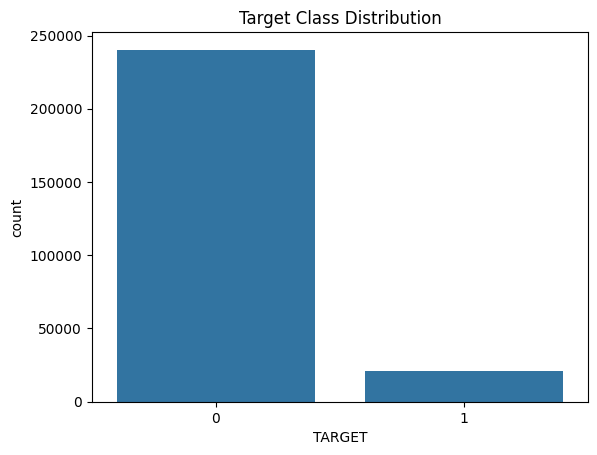

In [20]:
sns.countplot(data=train_ops, x='TARGET')
plt.title('Target Class Distribution')
plt.show()

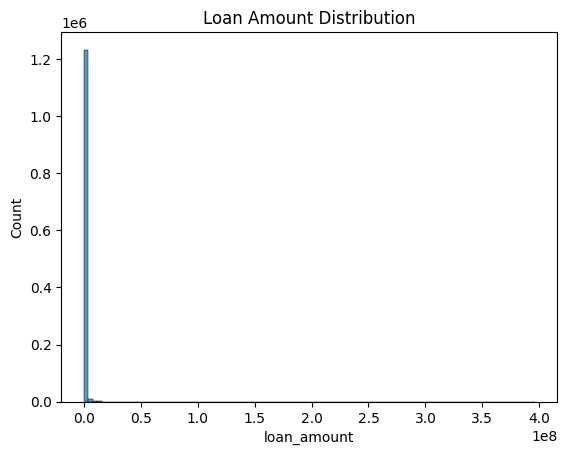

In [21]:
sns.histplot(acc_data['loan_amount'], kde=False, bins=100)
plt.title('Loan Amount Distribution')
plt.show()

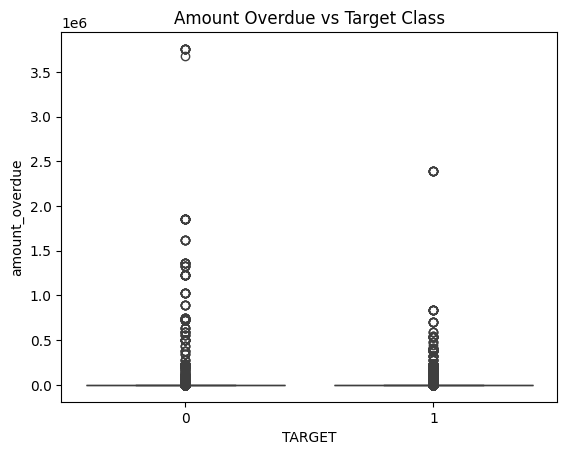

In [22]:
sns.boxplot(data=df, x='TARGET', y='amount_overdue')
plt.title('Amount Overdue vs Target Class')
plt.show()

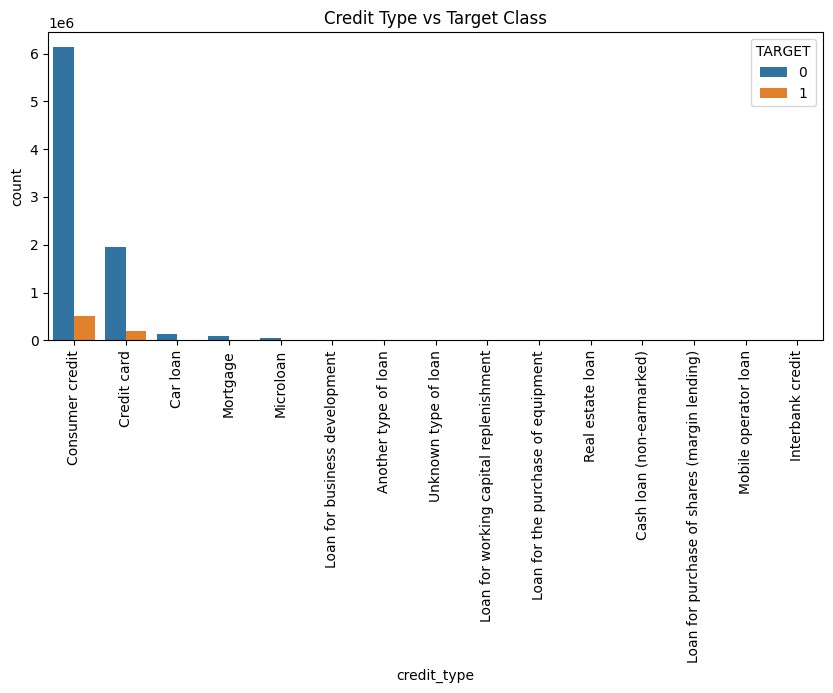

In [23]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='credit_type', hue='TARGET', order=df['credit_type'].value_counts().index)
plt.title('Credit Type vs Target Class')
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()


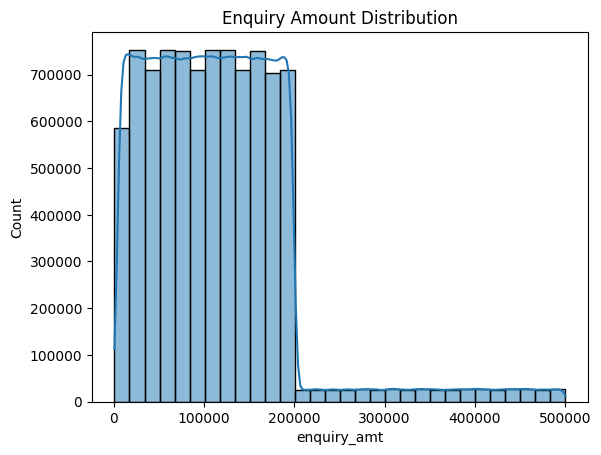

In [24]:
sns.histplot(df['enquiry_amt'], kde=True, bins=30)
plt.title('Enquiry Amount Distribution')
plt.show()

In [25]:
df.dtypes

credit_type                    object
loan_amount                   float64
amount_overdue                float64
open_date              datetime64[ns]
closed_date            datetime64[ns]
payment_hist_string            object
uid                            object
enquiry_type                   object
enquiry_amt                     int64
enquiry_date           datetime64[ns]
NAME_CONTRACT_TYPE             object
TARGET                          int64
dtype: object

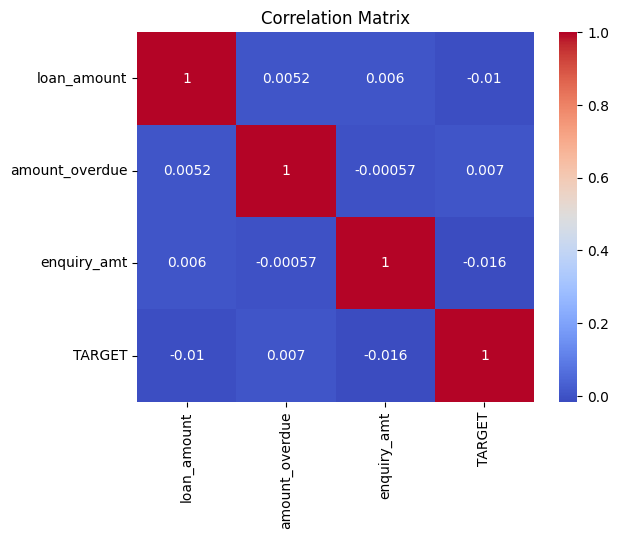

In [26]:
numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [27]:
acc_data['open_date'] = pd.to_datetime(acc_data['open_date'])
acc_data['closed_date'] = pd.to_datetime(acc_data['closed_date'])

In [28]:
user_loan_agg = acc_data.groupby('uid').agg({
    'loan_amount': ['count', 'sum', 'mean'],
    'amount_overdue': ['sum', 'mean', 'max'],
    'open_date': ['min', 'max'],
    'closed_date': ['min', 'max']
})

# flatten the pivot

user_loan_agg.columns = ['_'.join(col).strip() for col in user_loan_agg.columns]
user_loan_agg.reset_index(inplace=True)

In [29]:
user_loan_agg.head()

,uid,loan_amount_count,loan_amount_sum,loan_amount_mean,amount_overdue_sum,amount_overdue_mean,amount_overdue_max,open_date_min,open_date_max,closed_date_min,closed_date_max
0,AAA09044550,2,277245.000,138622.500,0.0,0.0,0.0,2018-03-08,2018-09-22,2019-07-25,2020-02-22
1,AAA10545297,1,80996.445,80996.445,0.0,0.0,0.0,2020-06-29,2020-06-29,NaT,NaT
2,AAA14112888,1,43771.500,43771.500,0.0,0.0,0.0,2020-06-09,2020-06-09,2020-09-09,2020-09-09
3,AAA20326915,8,591597.000,73949.625,0.0,0.0,0.0,2014-09-10,2020-06-28,2017-10-06,2020-05-13
4,AAA31604840,5,1591960.500,318392.100,0.0,0.0,0.0,2017-02-15,2020-10-10,2018-02-28,2020-10-15


In [30]:
user_df = user_loan_agg.merge(train_ops, on='uid', how='left')

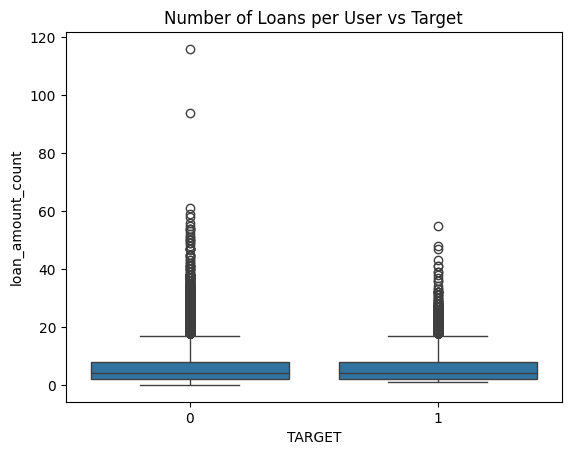

In [31]:
sns.boxplot(data=user_df, x='TARGET', y='loan_amount_count')
plt.title('Number of Loans per User vs Target')
plt.show()

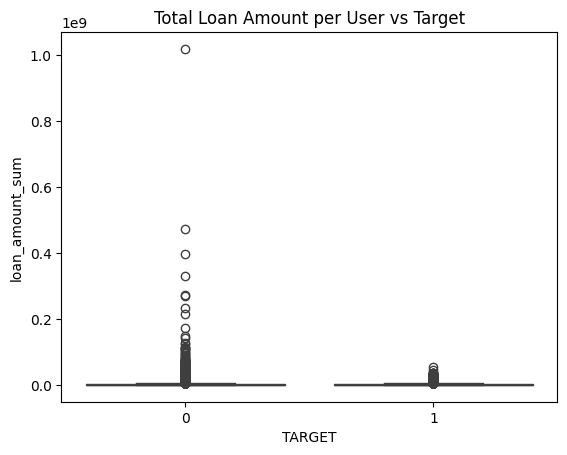

In [32]:
sns.boxplot(data=user_df, x='TARGET', y='loan_amount_sum')
plt.title('Total Loan Amount per User vs Target')
plt.show()


In [33]:
user_df[user_df['loan_amount_sum'] > 1e8]

,uid,loan_amount_count,loan_amount_sum,loan_amount_mean,amount_overdue_sum,amount_overdue_mean,amount_overdue_max,open_date_min,open_date_max,closed_date_min,closed_date_max,NAME_CONTRACT_TYPE,TARGET
9819,BEF63017336,20,3.292260e+08,1.646130e+07,0.0,0.0,0.0,2013-04-03,2020-02-02,2013-08-25,2020-04-01,Cash loans,0
23269,CSL21171303,10,1.136127e+08,1.136127e+07,0.0,0.0,0.0,2013-03-03,2018-06-07,2014-06-11,2019-01-13,Revolving loans,0
30560,DOK16678022,5,2.702042e+08,5.404083e+07,0.0,0.0,0.0,2015-06-18,2019-03-02,2015-12-18,2017-11-16,Cash loans,0
35287,EDB06104563,15,1.121568e+08,7.477117e+06,0.0,0.0,0.0,2013-06-02,2019-02-21,2014-11-12,2019-11-21,Revolving loans,0
45903,FIQ93565046,1,1.422900e+08,1.422900e+08,0.0,0.0,0.0,2014-07-27,2014-07-27,2018-01-27,2018-01-27,Revolving loans,0
50289,FVT19066952,2,3.961447e+08,1.980723e+08,0.0,0.0,0.0,2013-02-25,2019-08-26,2013-04-03,2019-10-12,Cash loans,0
77027,IYO09389415,6,2.342787e+08,3.904645e+07,0.0,0.0,0.0,2013-04-09,2019-06-12,2013-12-27,2020-05-20,Revolving loans,0
77668,JAL85809107,6,1.025325e+08,1.708875e+07,0.0,0.0,0.0,2016-12-24,2020-08-01,2018-01-29,2018-01-29,Cash loans,0
80870,JKB22433358,7,2.720182e+08,3.885975e+07,0.0,0.0,0.0,2013-04-21,2016-08-20,2014-09-26,2019-11-25,Cash loans,0
97504,LIU65861357,6,2.146637e+08,3.577728e+07,0.0,0.0,0.0,2013-04-21,2018-12-09,2017-08-05,2018-02-11,Cash loans,0


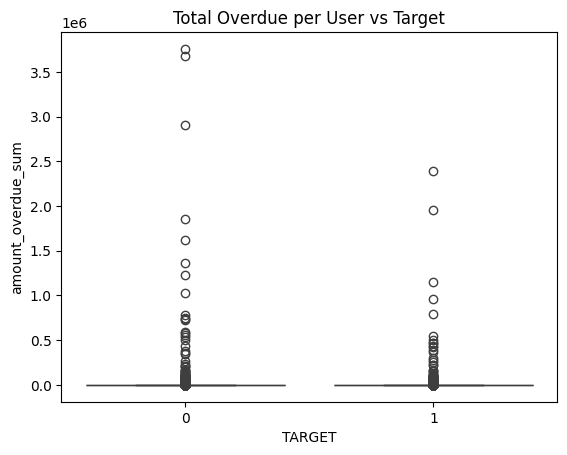

In [34]:
sns.boxplot(data=user_df, x='TARGET', y='amount_overdue_sum')
plt.title('Total Overdue per User vs Target')
plt.show()

In [35]:
user_df[user_df['amount_overdue_sum']>1e6]

,uid,loan_amount_count,loan_amount_sum,loan_amount_mean,amount_overdue_sum,amount_overdue_mean,amount_overdue_max,open_date_min,open_date_max,closed_date_min,closed_date_max,NAME_CONTRACT_TYPE,TARGET
34237,DZW81172740,14,2868093.0,2.048638e+05,1146667.500,8.190482e+04,588325.500,2013-05-25,2019-10-28,2014-10-11,2019-07-12,Cash loans,1
60816,HBP46998402,3,1107544.5,3.691815e+05,1851210.000,6.170700e+05,1851210.000,2014-02-20,2014-11-26,2015-07-15,2019-02-04,Cash loans,0
86171,KAC17126649,10,7431583.5,7.431583e+05,2901294.000,2.901294e+05,1329597.000,2014-07-29,2019-10-12,2015-07-29,2019-09-13,Cash loans,0
90617,KNQ66316837,4,2696598.0,6.741495e+05,2387232.000,5.968080e+05,2387232.000,2016-09-02,2020-06-01,2019-12-15,2019-12-15,Cash loans,1
105233,MGA62437019,1,2378088.0,2.378088e+06,1617403.500,1.617404e+06,1617403.500,2014-06-25,2014-06-25,NaT,NaT,Revolving loans,0
110514,MVW82424113,4,1931517.0,4.828792e+05,1025635.500,2.564089e+05,1025635.500,2013-12-14,2015-01-07,2017-06-07,2018-11-10,Cash loans,0
132360,PJI81833663,2,1421955.0,7.109775e+05,1224474.885,6.122374e+05,1224474.885,2013-06-29,2019-08-23,2020-08-22,2020-08-22,Cash loans,0
141672,QLB01170610,4,4575141.0,1.143785e+06,3756681.000,9.391702e+05,3756681.000,2013-06-10,2015-11-23,2015-12-24,2018-04-19,Cash loans,0
149015,RHI03222244,1,92565.0,9.256500e+04,1361214.000,1.361214e+06,1361214.000,2014-12-10,2014-12-10,NaT,NaT,Cash loans,0
184443,VJX91567020,7,4054000.5,5.791429e+05,3681063.000,5.258661e+05,3681063.000,2014-08-27,2017-08-02,2015-02-28,2020-04-10,Cash loans,0


In [36]:
enq_data['enquiry_date'] = pd.to_datetime(enq_data['enquiry_date'], errors='coerce')

user_enq_df = enq_data.groupby('uid').agg({
    'enquiry_amt': ['count', 'sum', 'mean', 'max'],
    'enquiry_date': ['min', 'max'],
	})

# flatten 
user_enq_df.columns = ['_'.join(col).strip() for col in user_enq_df.columns]
user_enq_df.reset_index(inplace=True)
user_enq_df.head()

,uid,enquiry_amt_count,enquiry_amt_sum,enquiry_amt_mean,enquiry_amt_max,enquiry_date_min,enquiry_date_max
0,AAA08065248,11,2064658,187696.181818,364751,2019-03-01,2020-12-30
1,AAA09044550,26,2659000,102269.230769,197000,2017-10-17,2020-12-29
2,AAA10545297,14,1317000,94071.428571,192000,2018-07-06,2020-10-29
3,AAA14112888,15,1465000,97666.666667,185000,2017-04-13,2020-07-05
4,AAA20326915,1,66000,66000.000000,66000,2020-08-14,2020-08-14


In [37]:
enq_df = user_enq_df.merge(train_ops, on='uid', how='left')

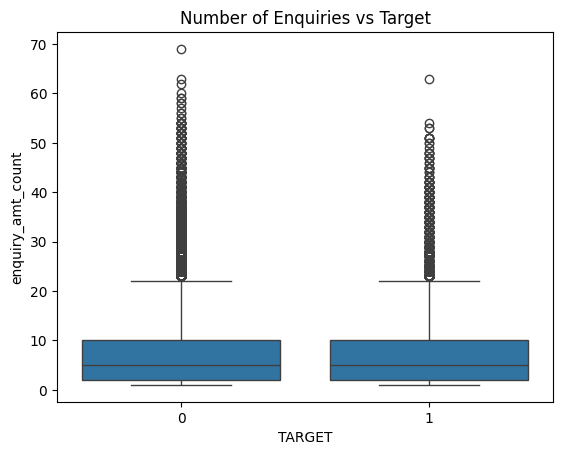

In [38]:
sns.boxplot(data=enq_df, x='TARGET', y='enquiry_amt_count')
plt.title('Number of Enquiries vs Target')
plt.show()


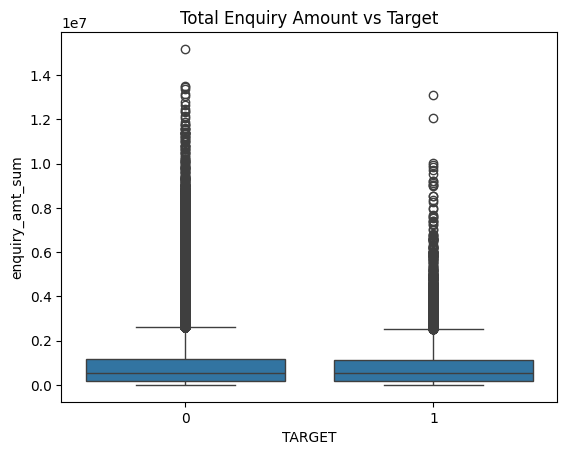

In [39]:
sns.boxplot(data=enq_df, x='TARGET', y='enquiry_amt_sum')
plt.title('Total Enquiry Amount vs Target')
plt.show()

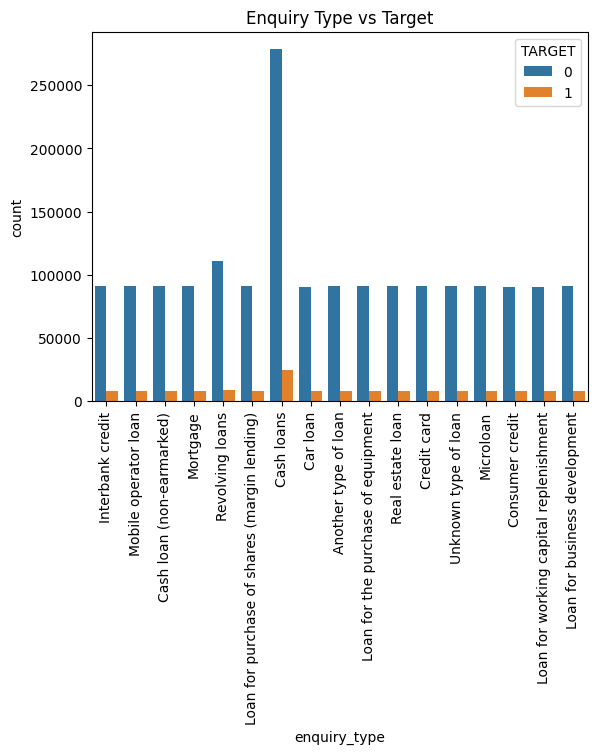

In [40]:
temp_enq = enq_data.merge(train_ops, on='uid')
sns.countplot(data=temp_enq, x='enquiry_type', hue='TARGET')
plt.title('Enquiry Type vs Target')
plt.xticks(rotation=90)
plt.show()
